In [1]:
import sys
import os

# Define the path to the modules directory
root_path = os.path.abspath("..")

# Add the path to the sys.path if it's not already there
if root_path not in sys.path:
    sys.path.append(root_path)

# Import modules from the 'modules' package
from modules.mamba import MambaModule
from modules.rnn import RNNModule
from modules.transformer import TransformerModule
from dataset import FrankaDataset

# Other imports
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import glob
from const import *
import yaml
import shutil
from pathlib import Path

/mnt/BigHD_1/loucas/miniconda3/envs/diss/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def copy_and_modify_yaml(input_path, output_dir, work_dir):
    """
    Copies a YAML file, modifies the resnet_checkpoint path, and returns the new path.

    Args:
    - input_path (str): The path to the input YAML file.
    - output_dir (str): The directory where the new YAML file will be saved.
    - work_dir (str): The new directory path to replace the resnet_checkpoint path.

    Returns:
    - str: The path to the new YAML file.
    """
    # Ensure output directory exists
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    # Read the input YAML file
    with open(input_path, "r") as file:
        yaml_data = yaml.safe_load(file)

    # Modify the resnet_checkpoint path
    if "resnet_checkpoint" in yaml_data:
        old_checkpoint_path = yaml_data["resnet_checkpoint"]
        filename = Path(old_checkpoint_path).name
        new_checkpoint_path = Path(work_dir) / filename
        yaml_data["resnet_checkpoint"] = str(new_checkpoint_path)

    # Create the new file path
    input_filename = Path(input_path).name
    new_filename = f"temp_{input_filename}"
    new_file_path = Path(output_dir) / new_filename

    # Write the modified data to the new YAML file
    with open(new_file_path, "w") as file:
        yaml.safe_dump(yaml_data, file)

    return str(new_file_path)

In [3]:
ds = FrankaDataset(data_dir=os.path.join(WORK_DIR, "data-w-camera"),
                      episode_length=200,
                      limited_gpu_memory=True,
                      stride=1,
                      prediction_distance=1,
                      window_size=10
                      )
dl = DataLoader(ds, batch_size=1, shuffle=False)

In [27]:
# small
rnn = RNNModule.load_from_checkpoint(
    checkpoint_path=RNN_SMALL_CHECKPOINT,
    hparams_file=copy_and_modify_yaml(RNN_SMALL_PARAMS, WORK_DIR, WORK_DIR),
)
mamba = MambaModule.load_from_checkpoint(
    checkpoint_path=MAMBA_SMALL_CHECKPOINT,
    hparams_file=copy_and_modify_yaml(MAMBA_SMALL_PARAMS, WORK_DIR, WORK_DIR),
)
transformer = TransformerModule.load_from_checkpoint(
    checkpoint_path=TRANSFORMER_SMALL_CHECKPOINT,
    hparams_file=copy_and_modify_yaml(TRANSFORMER_SMALL_PARAMS, WORK_DIR, WORK_DIR),
)

/mnt/BigHD_1/loucas/miniconda3/envs/diss/lib/python3.11/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.3, which is newer than your current Lightning version: v2.3.0


In [31]:
# large
rnn = RNNModule.load_from_checkpoint(
    checkpoint_path=RNN_LARGE_CHECKPOINT,
    hparams_file=copy_and_modify_yaml(RNN_LARGE_PARAMS, WORK_DIR, WORK_DIR),
)
mamba = MambaModule.load_from_checkpoint(
    checkpoint_path=MAMBA_LARGE_CHECKPOINT,
    hparams_file=copy_and_modify_yaml(MAMBA_LARGE_PARAMS, WORK_DIR, WORK_DIR),
)
transformer = TransformerModule.load_from_checkpoint(
    checkpoint_path=TRANSFORMER_LARGE_CHECKPOINT,
    hparams_file=copy_and_modify_yaml(TRANSFORMER_LARGE_PARAMS, WORK_DIR, WORK_DIR),
)

/mnt/BigHD_1/loucas/miniconda3/envs/diss/lib/python3.11/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.3, which is newer than your current Lightning version: v2.3.0


In [33]:
# huge
rnn = RNNModule.load_from_checkpoint(
    checkpoint_path=RNN_HUGE_CHECKPOINT,
    hparams_file=copy_and_modify_yaml(RNN_HUGE_PARAMS, WORK_DIR, WORK_DIR),
)
mamba = MambaModule.load_from_checkpoint(
    checkpoint_path=MAMBA_HUGE_CHECKPOINT,
    hparams_file=copy_and_modify_yaml(MAMBA_HUGE_PARAMS, WORK_DIR, WORK_DIR),
)
transformer = TransformerModule.load_from_checkpoint(
    checkpoint_path=TRANSFORMER_HUGE_CHECKPOINT,
    hparams_file=copy_and_modify_yaml(TRANSFORMER_HUGE_PARAMS, WORK_DIR, WORK_DIR),
)

/mnt/BigHD_1/loucas/miniconda3/envs/diss/lib/python3.11/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.3, which is newer than your current Lightning version: v2.3.0


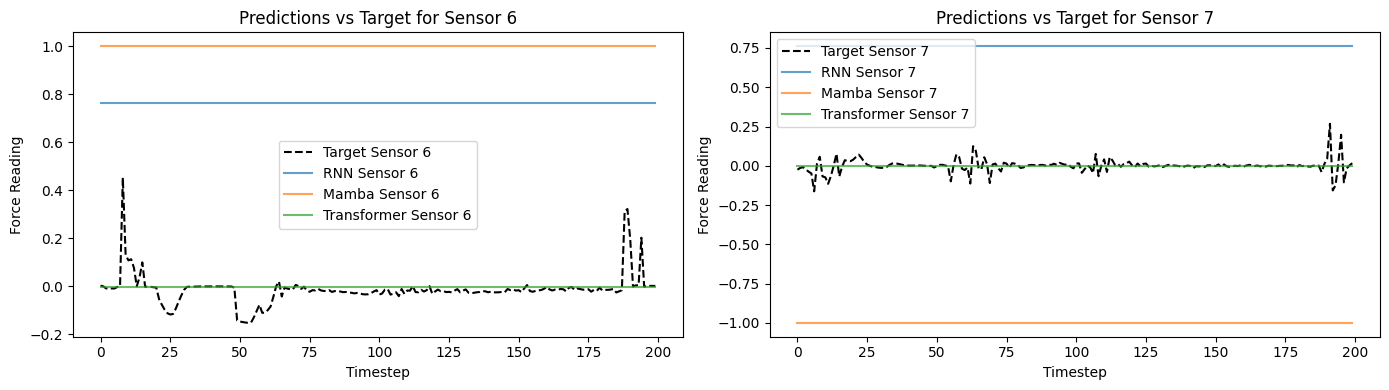

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store target and output values
targets = []

outputs_rnn_sensor_6 = []
outputs_rnn_sensor_7 = []

outputs_mamba_sensor_6 = []
outputs_mamba_sensor_7 = []

outputs_transformer_sensor_6 = []
outputs_transformer_sensor_7 = []

# Assuming dl is your dataloader and model is your trained model
for i, batch in enumerate(dl):
    if i >= 200:
        break
    targets.append(batch["sensor_data"][0, -1:, [6, 7]].cpu().numpy())

    output_rnn = rnn.predict(batch)
    outputs_rnn_sensor_6.append(output_rnn[0, 0, 0].item())
    outputs_rnn_sensor_7.append(output_rnn[0, 0, 1].item())

    output_mamba = mamba.predict(batch)
    outputs_mamba_sensor_6.append(output_mamba[0, 0, 0].item())
    outputs_mamba_sensor_7.append(output_mamba[0, 0, 1].item())

    output_transformer = transformer.predict(batch)
    outputs_transformer_sensor_6.append(output_transformer[0, 0, 0].item())
    outputs_transformer_sensor_7.append(output_transformer[0, 0, 1].item())

# Convert lists to numpy arrays for easier plotting
targets = np.array(targets).reshape(-1, 2)
outputs_rnn_sensor_6 = np.array(outputs_rnn_sensor_6)
outputs_rnn_sensor_7 = np.array(outputs_rnn_sensor_7)
outputs_mamba_sensor_6 = np.array(outputs_mamba_sensor_6)
outputs_mamba_sensor_7 = np.array(outputs_mamba_sensor_7)
outputs_transformer_sensor_6 = np.array(outputs_transformer_sensor_6)
outputs_transformer_sensor_7 = np.array(outputs_transformer_sensor_7)

# Plotting
plt.figure(figsize=(14, 4))

# Plot for sensor 6
plt.subplot(1, 2, 1)
plt.plot(targets[:, 0], label="Target Sensor 6", linestyle="--", color="black")
plt.plot(outputs_rnn_sensor_6, label="RNN Sensor 6", alpha=0.7)
plt.plot(outputs_mamba_sensor_6, label="Mamba Sensor 6", alpha=0.7)
plt.plot(outputs_transformer_sensor_6, label="Transformer Sensor 6", alpha=0.7)
plt.xlabel("Timestep")
plt.ylabel("Force Reading")
plt.title("Predictions vs Target for Sensor 6")
plt.legend()

# Plot for sensor 7
plt.subplot(1, 2, 2)
plt.plot(targets[:, 1], label="Target Sensor 7", linestyle="--", color="black")
plt.plot(outputs_rnn_sensor_7, label="RNN Sensor 7", alpha=0.7)
plt.plot(outputs_mamba_sensor_7, label="Mamba Sensor 7", alpha=0.7)
plt.plot(outputs_transformer_sensor_7, label="Transformer Sensor 7", alpha=0.7)
plt.xlabel("Timestep")
plt.ylabel("Force Reading")
plt.title("Predictions vs Target for Sensor 7")
plt.legend()

plt.tight_layout()
plt.savefig("sensor-inference-huge.pdf")
plt.show()